In [1]:
# File operations
import glob as glob

# Visualizations
import sunpy.map
import matplotlib.pyplot as plt

import os
from astropy.io import fits
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
sharp_path = '/data/SHARPS/raw-sharps/'
mpil_path = '/data/MPIL/HMI_PIL/'

In [3]:
pils = glob.glob(str(mpil_path) + '377' + "/*.csv")
pils

# Read the CSV file into a dataframe and set the first column as the index
mpil_df = pd.read_csv('/data/MPIL/HMI_PIL/377/377_pil.csv', index_col=0, parse_dates=True)

# Drop all rows with missing values
mpil_df = mpil_df.dropna()

# Print the resulting dataframe
mpil_df

,num_PILs,sum_PIL_length,sum_RoPI_Area,sum_mag_field_strength,fra_dim,eige_vals,convexity,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7,patch_shape,detection_flag
2011-02-11 00:48:00,1.0,15.0,33.0,2522.9,0.183418,"(0.3402738668241234, 21.831154704604447)",1.763316,0.275911,0.071525,0.002035,0.000386,1.210977e-07,-0.000009,3.192505e-07,"(377, 744)",detected
2011-02-11 02:12:00,3.0,46.0,137.0,12510.3,0.616514,"(6714.442750741868, 50.33406085233503)",8.744186,21.304741,426.880952,27367.277547,26562.929968,7.161919e+08,548777.850504,9.148790e+05,"(377, 744)",detected
2011-02-11 02:24:00,1.0,33.0,87.0,7204.2,0.557397,"(5.340366091818829, 80.94561875666602)",1.944963,0.316937,0.077120,0.009900,0.001197,-4.006121e-06,-0.000328,-9.610269e-07,"(377, 744)",detected
2011-02-11 02:36:00,1.0,34.0,94.0,8865.2,0.576185,"(4.757550840787488, 88.22016751928379)",1.953718,0.331776,0.088698,0.009941,0.001177,-4.014754e-06,-0.000350,3.019909e-07,"(377, 744)",detected
2011-02-11 02:48:00,1.0,33.0,114.0,10227.0,0.576185,"(92.70022036784978, 5.530840238210857)",2.020274,0.360812,0.102516,0.012656,0.001615,-5.845364e-06,-0.000440,4.372925e-06,"(377, 744)",detected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-18 09:12:00,10.0,380.0,1121.0,173445.8,0.783980,"(8403.612430926405, 560.5410408136337)",1.799180,1.229252,1.174209,0.165609,0.032870,1.442791e-03,0.017269,-1.949235e-03,"(377, 744)",detected
2011-02-18 09:24:00,10.0,372.0,1195.0,184292.1,0.838492,"(9300.773177973308, 601.5589308288238)",2.029259,1.194762,1.141653,0.032693,0.018948,4.690034e-04,0.009274,-4.950553e-05,"(377, 744)",detected
2011-02-18 09:36:00,12.0,413.0,1288.0,184992.5,0.818148,"(8492.496759180154, 570.7854289295848)",1.847178,1.247156,1.243021,0.196831,0.079452,9.365779e-03,0.075459,-3.317089e-03,"(377, 744)",detected
2011-02-18 09:48:00,9.0,378.0,1155.0,171461.1,0.784575,"(8784.759476748237, 541.4731731051013)",1.820565,1.094546,0.953834,0.031230,0.004760,2.677341e-05,-0.002407,5.148541e-05,"(377, 744)",detected


In [4]:
sharps = glob.glob(str(sharp_path) + '377' + "/*magnetogram.fits")
sharps

['/data/SHARPS/raw-sharps/377/hmi.sharp_cea_720s.377.20110213_042400_TAI.magnetogram.fits',
 '/data/SHARPS/raw-sharps/377/hmi.sharp_cea_720s.377.20110214_001200_TAI.magnetogram.fits',
 '/data/SHARPS/raw-sharps/377/hmi.sharp_cea_720s.377.20110214_114800_TAI.magnetogram.fits',
 '/data/SHARPS/raw-sharps/377/hmi.sharp_cea_720s.377.20110214_063600_TAI.magnetogram.fits',
 '/data/SHARPS/raw-sharps/377/hmi.sharp_cea_720s.377.20110214_224800_TAI.magnetogram.fits',
 '/data/SHARPS/raw-sharps/377/hmi.sharp_cea_720s.377.20110215_183600_TAI.magnetogram.fits',
 '/data/SHARPS/raw-sharps/377/hmi.sharp_cea_720s.377.20110213_020000_TAI.magnetogram.fits',
 '/data/SHARPS/raw-sharps/377/hmi.sharp_cea_720s.377.20110212_104800_TAI.magnetogram.fits',
 '/data/SHARPS/raw-sharps/377/hmi.sharp_cea_720s.377.20110212_234800_TAI.magnetogram.fits',
 '/data/SHARPS/raw-sharps/377/hmi.sharp_cea_720s.377.20110212_073600_TAI.magnetogram.fits',
 '/data/SHARPS/raw-sharps/377/hmi.sharp_cea_720s.377.20110213_193600_TAI.magneto

Total number of sample images: 1247


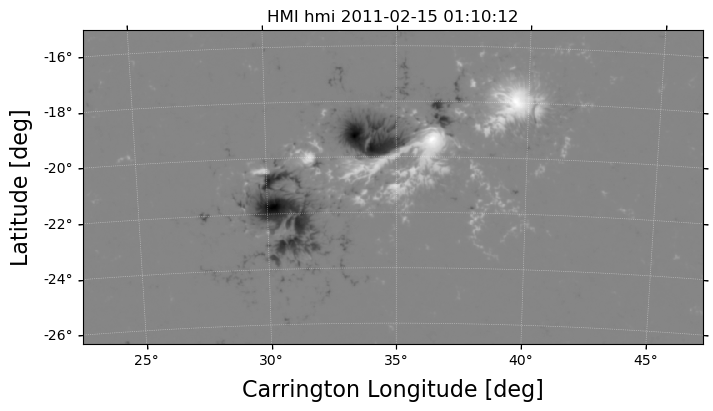

In [5]:
print('Total number of sample images: ' + str(len(sharps)))
hmi_magmap = sunpy.map.Map(sharps[998])

fig = plt.figure(figsize=(8,6))
hmi_magmap.plot()
plt.xlabel('Carrington Longitude [deg]',fontsize = 16)
plt.ylabel('Latitude [deg]',fontsize = 16)
plt.show()

In [6]:
# Define the folder to search in
folder_path = sharp_path + '377' 

# Define the list of features to extract from the FITS files
features = ['T_REC', 'LAT_MIN', 'LON_MIN', 'LAT_MAX', 'LON_MAX']

# Create an empty dataframe to hold the extracted features
df = pd.DataFrame(columns=features)

# Loop over all files in the folder_path directory
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # Check if the file has a .fits extension
        if file.endswith('magnetogram.fits'):
            # Open the FITS file and extract the required features
            with fits.open(os.path.join(root, file)) as hdul:
                data = [hdul[1].header.get(feature) for feature in features]
            
            # Create a dictionary mapping the feature names to their extracted values
            row = dict(zip(features, data))
            
            # Append the dictionary as a new row in the dataframe
            df = df.append(row, ignore_index=True)


# Convert TAI to datetime
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='%Y.%m.%d_%H:%M:%S_TAI')

# Print the resulting dataframe
print(df)

                   T_REC    LAT_MIN    LON_MIN    LAT_MAX    LON_MAX
0    2011-02-13 04:24:00 -24.386366 -19.285856  -16.66943  -4.003238
1    2011-02-14 00:12:00 -24.695623  -9.511865 -16.027655   7.798236
2    2011-02-14 11:48:00 -24.993244  -3.578273 -15.785728  14.506336
3    2011-02-14 06:36:00 -24.878531  -6.249819 -15.876381  11.543277
4    2011-02-14 22:48:00 -25.217722   2.170774 -15.682114  20.512848
...                  ...        ...        ...        ...        ...
1242 2011-02-20 16:36:00 -22.912615  77.389496 -15.788887  92.525467
1243 2011-02-20 01:48:00 -23.356504  68.706802 -15.851467  89.972908
1244 2011-02-17 02:36:00 -26.603922  30.336603  -15.55213  49.074268
1245 2011-02-11 18:00:00 -22.637762 -36.023769 -17.434319 -24.320398
1246 2011-02-18 05:00:00 -26.577133  44.056469 -15.456003  64.036308

[1247 rows x 5 columns]


In [7]:
#from datetime import datetime
#
#tai_time_str = '2011.09.21_00:00:00_TAI'
#
## Extract the date and time strings from the TAI time string
#date_str, time_str, _ = tai_time_str.split('_')
#year, month, day = map(int, date_str.split('.'))
#hour, minute, second = map(int, time_str.split(':'))
#
## Create a datetime object with the TAI time information
#tai_datetime = datetime(year, month, day, hour, minute, second)
#
## Print the TAI datetime object
#print(tai_datetime)

In [8]:
df

,T_REC,LAT_MIN,LON_MIN,LAT_MAX,LON_MAX
0,2011-02-13 04:24:00,-24.386366,-19.285856,-16.66943,-4.003238
1,2011-02-14 00:12:00,-24.695623,-9.511865,-16.027655,7.798236
2,2011-02-14 11:48:00,-24.993244,-3.578273,-15.785728,14.506336
3,2011-02-14 06:36:00,-24.878531,-6.249819,-15.876381,11.543277
4,2011-02-14 22:48:00,-25.217722,2.170774,-15.682114,20.512848
...,...,...,...,...,...
1242,2011-02-20 16:36:00,-22.912615,77.389496,-15.788887,92.525467
1243,2011-02-20 01:48:00,-23.356504,68.706802,-15.851467,89.972908
1244,2011-02-17 02:36:00,-26.603922,30.336603,-15.55213,49.074268
1245,2011-02-11 18:00:00,-22.637762,-36.023769,-17.434319,-24.320398


In [9]:
mpil_df

,num_PILs,sum_PIL_length,sum_RoPI_Area,sum_mag_field_strength,fra_dim,eige_vals,convexity,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7,patch_shape,detection_flag
2011-02-11 00:48:00,1.0,15.0,33.0,2522.9,0.183418,"(0.3402738668241234, 21.831154704604447)",1.763316,0.275911,0.071525,0.002035,0.000386,1.210977e-07,-0.000009,3.192505e-07,"(377, 744)",detected
2011-02-11 02:12:00,3.0,46.0,137.0,12510.3,0.616514,"(6714.442750741868, 50.33406085233503)",8.744186,21.304741,426.880952,27367.277547,26562.929968,7.161919e+08,548777.850504,9.148790e+05,"(377, 744)",detected
2011-02-11 02:24:00,1.0,33.0,87.0,7204.2,0.557397,"(5.340366091818829, 80.94561875666602)",1.944963,0.316937,0.077120,0.009900,0.001197,-4.006121e-06,-0.000328,-9.610269e-07,"(377, 744)",detected
2011-02-11 02:36:00,1.0,34.0,94.0,8865.2,0.576185,"(4.757550840787488, 88.22016751928379)",1.953718,0.331776,0.088698,0.009941,0.001177,-4.014754e-06,-0.000350,3.019909e-07,"(377, 744)",detected
2011-02-11 02:48:00,1.0,33.0,114.0,10227.0,0.576185,"(92.70022036784978, 5.530840238210857)",2.020274,0.360812,0.102516,0.012656,0.001615,-5.845364e-06,-0.000440,4.372925e-06,"(377, 744)",detected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-18 09:12:00,10.0,380.0,1121.0,173445.8,0.783980,"(8403.612430926405, 560.5410408136337)",1.799180,1.229252,1.174209,0.165609,0.032870,1.442791e-03,0.017269,-1.949235e-03,"(377, 744)",detected
2011-02-18 09:24:00,10.0,372.0,1195.0,184292.1,0.838492,"(9300.773177973308, 601.5589308288238)",2.029259,1.194762,1.141653,0.032693,0.018948,4.690034e-04,0.009274,-4.950553e-05,"(377, 744)",detected
2011-02-18 09:36:00,12.0,413.0,1288.0,184992.5,0.818148,"(8492.496759180154, 570.7854289295848)",1.847178,1.247156,1.243021,0.196831,0.079452,9.365779e-03,0.075459,-3.317089e-03,"(377, 744)",detected
2011-02-18 09:48:00,9.0,378.0,1155.0,171461.1,0.784575,"(8784.759476748237, 541.4731731051013)",1.820565,1.094546,0.953834,0.031230,0.004760,2.677341e-05,-0.002407,5.148541e-05,"(377, 744)",detected


In [10]:
# set the datetime column as the index for the second dataframe
df.set_index('T_REC', inplace=True)

# merge the two dataframes on their datetime index
mpil_ar = pd.merge(mpil_df, df, left_index=True, right_index=True)

In [11]:
mpil_ar

,num_PILs,sum_PIL_length,sum_RoPI_Area,sum_mag_field_strength,fra_dim,eige_vals,convexity,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6,Hu7,patch_shape,detection_flag,LAT_MIN,LON_MIN,LAT_MAX,LON_MAX
2011-02-11 00:48:00,1.0,15.0,33.0,2522.9,0.183418,"(0.3402738668241234, 21.831154704604447)",1.763316,0.275911,0.071525,0.002035,0.000386,1.210977e-07,-0.000009,3.192505e-07,"(377, 744)",detected,-20.237997,-41.355919,-18.656544,-37.69355
2011-02-11 02:12:00,3.0,46.0,137.0,12510.3,0.616514,"(6714.442750741868, 50.33406085233503)",8.744186,21.304741,426.880952,27367.277547,26562.929968,7.161919e+08,548777.850504,9.148790e+05,"(377, 744)",detected,-20.409372,-41.084599,-18.425547,-35.965431
2011-02-11 02:24:00,1.0,33.0,87.0,7204.2,0.557397,"(5.340366091818829, 80.94561875666602)",1.944963,0.316937,0.077120,0.009900,0.001197,-4.006121e-06,-0.000328,-9.610269e-07,"(377, 744)",detected,-20.490366,-41.24025,-18.352896,-35.759865
2011-02-11 02:36:00,1.0,34.0,94.0,8865.2,0.576185,"(4.757550840787488, 88.22016751928379)",1.953718,0.331776,0.088698,0.009941,0.001177,-4.014754e-06,-0.000350,3.019909e-07,"(377, 744)",detected,-20.573765,-41.395947,-18.236444,-35.425243
2011-02-11 02:48:00,1.0,33.0,114.0,10227.0,0.576185,"(92.70022036784978, 5.530840238210857)",2.020274,0.360812,0.102516,0.012656,0.001615,-5.845364e-06,-0.000440,4.372925e-06,"(377, 744)",detected,-20.615223,-41.333267,-18.212057,-35.304451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-18 09:12:00,10.0,380.0,1121.0,173445.8,0.783980,"(8403.612430926405, 560.5410408136337)",1.799180,1.229252,1.174209,0.165609,0.032870,1.442791e-03,0.017269,-1.949235e-03,"(377, 744)",detected,-26.518274,46.21714,-15.485362,66.476578
2011-02-18 09:24:00,10.0,372.0,1195.0,184292.1,0.838492,"(9300.773177973308, 601.5589308288238)",2.029259,1.194762,1.141653,0.032693,0.018948,4.690034e-04,0.009274,-4.950553e-05,"(377, 744)",detected,-26.509319,46.319607,-15.489923,66.600731
2011-02-18 09:36:00,12.0,413.0,1288.0,184992.5,0.818148,"(8492.496759180154, 570.7854289295848)",1.847178,1.247156,1.243021,0.196831,0.079452,9.365779e-03,0.075459,-3.317089e-03,"(377, 744)",detected,-26.500114,46.420052,-15.490437,66.707054
2011-02-18 09:48:00,9.0,378.0,1155.0,171461.1,0.784575,"(8784.759476748237, 541.4731731051013)",1.820565,1.094546,0.953834,0.031230,0.004760,2.677341e-05,-0.002407,5.148541e-05,"(377, 744)",detected,-26.49016,46.521477,-15.49389,66.822548
